# __``Recommender System``__

## **Content Based Filtering**

<hr>

Recommender System is a system that seeks to predict or filter preferences according to the user’s choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general.

Like many machine learning techniques, a recommender system makes prediction based on users’ historical behaviors. Specifically, it’s to predict user preference for a set of items based on past experience. To build a recommender system, the most two popular approaches are Content-based and Collaborative Filtering.



Recommender systems produce a list of recommendations in any of the two ways –

### 1. **Collaborative filtering**

Collaborative filtering approaches build a model from user’s past behavior (i.e. items purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that user may have an interest in.

Collaborative Filtering, on the other hand, doesn’t need anything else except users’ historical preference on a set of items. Because it’s based on historical data, the core assumption here is that the users who have agreed in the past tend to also agree in the future. 

### 2. **Content-based filtering**

Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user’s preferences. It recommends items based on user’s past preferences.

Content-based approach requires a good amount of information of items’ own features, rather than using users’ interactions and feedbacks. For example, it can be movie attributes such as genre, year, director, actor etc., or textual content of articles that can extracted by applying Natural Language Processing. 

<hr>

### How to make content-based filtering:

__1. Calculate similarity among the items:__

-    Cosine-Based Similarity
-    Correlation-Based Similarity
-    Adjusted Cosine Similarity
-    1-Jaccard distance

__2. Calculation of Prediction:__

-    Weighted Sum
-    Regression

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Understanding Content Based Filtering using __``Simple Dataset``__

Rekomendasi diberikan berdasarkan features dari item yang disukai user

**CountVectorizer in Python**

In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called tokenization. These words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature extraction (or vectorization).

Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

__Cosine Similarity__

Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.


In [2]:
#1. Membuat dataset sederhana

df = pd.DataFrame([
    {'title': 'A', 'genre': 'Pop', 'penyanyi': 'Andi'},
    {'title': 'B', 'genre': 'Keroncong', 'penyanyi': 'Andi'},
    {'title': 'C', 'genre': 'Dangdut', 'penyanyi': 'Andi'},
    {'title': 'D', 'genre': 'Pop', 'penyanyi': 'Budi'},
    {'title': 'E', 'genre': 'Keroncong', 'penyanyi': 'Budi'},
    {'title': 'F', 'genre': 'Dangdut', 'penyanyi': 'Budi'},
    {'title': 'G', 'genre': 'Pop', 'penyanyi': 'Caca'},
    {'title': 'H', 'genre': 'Keroncong', 'penyanyi': 'Caca'},
    {'title': 'I', 'genre': 'Dangdut', 'penyanyi': 'Caca'},
    {'title': 'J', 'genre': 'Pop', 'penyanyi': 'Caca'},
])

df

,title,genre,penyanyi
0,A,Pop,Andi
1,B,Keroncong,Andi
2,C,Dangdut,Andi
3,D,Pop,Budi
4,E,Keroncong,Budi
5,F,Dangdut,Budi
6,G,Pop,Caca
7,H,Keroncong,Caca
8,I,Dangdut,Caca
9,J,Pop,Caca


In [3]:
#2. Melakukan countvectorizer

cv = CountVectorizer()
cv.fit(df['genre'])
cv.vocabulary_

{'pop': 2, 'keroncong': 1, 'dangdut': 0}

In [4]:
#3. Melakukan transform

mgenre = cv.transform(df['genre'])
cv.get_feature_names()

['dangdut', 'keroncong', 'pop']

In [5]:
#4. Ditampilkan dalam dataframe

df_cv = pd.concat([df, pd.DataFrame(mgenre.toarray(), columns = cv.get_feature_names())], axis = 1)
df_cv

,title,genre,penyanyi,dangdut,keroncong,pop
0,A,Pop,Andi,0,0,1
1,B,Keroncong,Andi,0,1,0
2,C,Dangdut,Andi,1,0,0
3,D,Pop,Budi,0,0,1
4,E,Keroncong,Budi,0,1,0
5,F,Dangdut,Budi,1,0,0
6,G,Pop,Caca,0,0,1
7,H,Keroncong,Caca,0,1,0
8,I,Dangdut,Caca,1,0,0
9,J,Pop,Caca,0,0,1


__DATA SEDERHANA (2)__

In [8]:
#1. Membuat data sederhana yg lain

doc_1 = 'Today, we learn how to build dinamic website and mobile apps'
doc_2 = 'Today, we learn how to promote mobile apps to segmented market'
doc_3 = 'Today, we learn how to build recommender system'

documents = [doc_1, doc_2, doc_3]

In [9]:
#2. Melakukan countvect

count_vect = CountVectorizer(stop_words = 'english')
sparse_matrix = count_vect.fit_transform(documents)

In [10]:
#ditampilkan di dataframe

df_doc = pd.DataFrame(sparse_matrix.toarray(), columns=count_vect.get_feature_names(), index='doc_1 doc_2 doc_3'.split())
df_doc['doc'] = documents
df_doc

,apps,build,dinamic,learn,market,mobile,promote,recommender,segmented,today,website,doc
doc_1,1,1,1,1,0,1,0,0,0,1,1,"Today, we learn how to build dinamic website a..."
doc_2,1,0,0,1,1,1,1,0,1,1,0,"Today, we learn how to promote mobile apps to ..."
doc_3,0,1,0,1,0,0,0,1,0,1,0,"Today, we learn how to build recommender system"


In [11]:
#4. Melihat kemiripan antar doc

cosine_similarity(df_doc.drop('doc', axis=1))

array([[1.        , 0.57142857, 0.56694671],
       [0.57142857, 1.        , 0.37796447],
       [0.56694671, 0.37796447, 1.        ]])

In [12]:
#5. Dijadikan dalam dataframe

cos_score = cosine_similarity(mgenre)
pd.DataFrame(cos_score, index=df['genre'], columns=df['genre'])

genre,Pop,Keroncong,Dangdut,Pop,Keroncong,Dangdut,Pop,Keroncong,Dangdut,Pop
genre,,,,,,,,,,
Pop,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Keroncong,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Dangdut,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Pop,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Keroncong,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Dangdut,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Pop,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Keroncong,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Dangdut,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Yang paling mirip dengan dokumen 1, yaitu dokumen 2. baru dokumen 3
Dokumen 2 jauh kemiripannya dengan dokumen 3.

### __Music Recommendation__

**Enumerate() in Python**

A lot of times when dealing with iterators, we also get a need to keep a count of iterations. Python eases the programmers’ task by providing a built-in function enumerate() for this task. Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.
[source](https://www.geeksforgeeks.org/enumerate-in-python/)

In [13]:
#1. Menampilkan data yg hendak dipakai

df

,title,genre,penyanyi
0,A,Pop,Andi
1,B,Keroncong,Andi
2,C,Dangdut,Andi
3,D,Pop,Budi
4,E,Keroncong,Budi
5,F,Dangdut,Budi
6,G,Pop,Caca
7,H,Keroncong,Caca
8,I,Dangdut,Caca
9,J,Pop,Caca


In [14]:
#2. Mencari nilai cos score dari musik yg terakhir didengar

last_played = int(input('Musik terakhir yang di dengar?'))

music_recom = list(enumerate(cos_score[last_played]))
music_recom

Musik terakhir yang di dengar? 1


[(0, 0.0),
 (1, 1.0),
 (2, 0.0),
 (3, 0.0),
 (4, 1.0),
 (5, 0.0),
 (6, 0.0),
 (7, 1.0),
 (8, 0.0),
 (9, 0.0)]

In [16]:
#3. Merekomendasi dari lagu terakhir yg didengar

your_recom = sorted(music_recom, key=lambda x: x[1], reverse=True)
your_recom

[(1, 1.0),
 (4, 1.0),
 (7, 1.0),
 (0, 0.0),
 (2, 0.0),
 (3, 0.0),
 (5, 0.0),
 (6, 0.0),
 (8, 0.0),
 (9, 0.0)]

In [17]:
#Menampilkan hasil 5 rekomendasi teratas

for i in your_recom[:5]:
    print(df.iloc[i[0]])

title               B
genre       Keroncong
penyanyi         Andi
Name: 1, dtype: object
title               E
genre       Keroncong
penyanyi         Budi
Name: 4, dtype: object
title               H
genre       Keroncong
penyanyi         Caca
Name: 7, dtype: object
title          A
genre        Pop
penyanyi    Andi
Name: 0, dtype: object
title             C
genre       Dangdut
penyanyi       Andi
Name: 2, dtype: object


## __Anime Recommendation__

In [18]:
#1. Load dataset yg akan digunakan dan mengambil 850 data saja

anime = pd.read_csv('anime.csv')
anime = anime.iloc[:850]
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [19]:
#Mengecek shape dari dataset

anime.shape

(850, 7)

In [20]:
#Menghitung data yg null

anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

<AxesSubplot:>

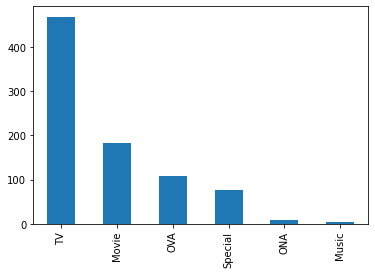

In [31]:
#Melihat jumlah tiap type dalam plot

anime['type'].value_counts().plot(kind='bar')

In [21]:
#Melist jumlah anime berdasarkan genre

anime['genre'].value_counts()

Adventure, Comedy, Mystery, Police, Shounen                            17
Comedy, School, Slice of Life                                          15
Comedy, School, Shounen, Sports                                        10
Comedy, Drama, Shounen, Sports                                         10
Action, Drama, Mecha, Military, Sci-Fi, Space                           9
                                                                       ..
Action, Drama, Historical, Martial Arts, Romance, Samurai               1
Action, Mecha, Mystery, Police, Psychological, Sci-Fi, Seinen           1
Action, Military, Sci-Fi, Space                                         1
Action, Adventure, Comedy, Drama, Fantasy, Magic, Military, Shounen     1
Action, Comedy, Fantasy, Magic, School, Shoujo, Slice of Life           1
Name: genre, Length: 517, dtype: int64

In [22]:
#Mengecek jumlah anime dalam dataset

len(anime)

850

__CREATE RECOMMENDER SYSTEM__

In [23]:
#2. Melakukan count vectorizer

cvr = CountVectorizer(
    tokenizer = lambda x: x.split(', ')
)

mgenre = cvr.fit_transform(anime['genre'])

mgenre.toarray()

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
#3.Mengecek jumlah genre setelah countvectorizer

print(len(cvr.get_feature_names()))
print(cvr.get_feature_names())

40
['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons', 'drama', 'ecchi', 'fantasy', 'game', 'harem', 'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts', 'mecha', 'military', 'music', 'mystery', 'parody', 'police', 'psychological', 'romance', 'samurai', 'school', 'sci-fi', 'seinen', 'shoujo', 'shoujo ai', 'shounen', 'shounen ai', 'slice of life', 'space', 'sports', 'super power', 'supernatural', 'thriller', 'vampire']


In [25]:
#4. Cek kemiripan setiap movie 

cos_score_anime = cosine_similarity(mgenre)
cos_score_anime

array([[1.        , 0.18898224, 0.        , ..., 0.4472136 , 0.        ,
        0.40824829],
       [0.18898224, 1.        , 0.28571429, ..., 0.16903085, 0.        ,
        0.3086067 ],
       [0.        , 0.28571429, 1.        , ..., 0.3380617 , 0.26726124,
        0.15430335],
       ...,
       [0.4472136 , 0.16903085, 0.3380617 , ..., 1.        , 0.        ,
        0.18257419],
       [0.        , 0.        , 0.26726124, ..., 0.        , 1.        ,
        0.28867513],
       [0.40824829, 0.3086067 , 0.15430335, ..., 0.18257419, 0.28867513,
        1.        ]])

In [26]:
#Mengecek jumlah nilai score === jumlah film

cos_score_anime.shape

(850, 850)

In [27]:
#5. Dijadikan dataframe

pd.DataFrame(cos_score_anime, index = anime['name'], columns = anime['name'])

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Mobile Suit Gundam: Char&#039;s Counterattack,Naruto,New Game!,Shigatsu wa Kimi no Uso: Moments,Top wo Nerae 2! Diebuster,Baka to Test to Shoukanjuu: Matsuri,Blood+,Chrno Crusade,Free!: FrFr - Short Movie,Fruits Basket
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,1.000000,0.188982,0.000000,0.000000,0.000000,0.447214,0.000000,0.250000,0.000000,0.000000,...,0.223607,0.000000,0.000000,0.000000,0.000000,0.288675,0.377964,0.447214,0.000000,0.408248
Fullmetal Alchemist: Brotherhood,0.188982,1.000000,0.285714,0.000000,0.285714,0.338062,0.566947,0.377964,0.285714,0.285714,...,0.338062,0.338062,0.000000,0.267261,0.169031,0.000000,0.428571,0.169031,0.000000,0.308607
Gintama°,0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.169031,0.507093,0.267261,0.267261,0.507093,0.218218,0.142857,0.338062,0.267261,0.154303
Steins;Gate,0.000000,0.000000,0.267261,1.000000,0.267261,0.000000,0.000000,0.353553,0.267261,0.267261,...,0.316228,0.000000,0.000000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000
Gintama&#039;,0.000000,0.285714,1.000000,0.267261,1.000000,0.338062,0.377964,0.188982,1.000000,1.000000,...,0.169031,0.507093,0.267261,0.267261,0.507093,0.218218,0.142857,0.338062,0.267261,0.154303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Baka to Test to Shoukanjuu: Matsuri,0.288675,0.000000,0.218218,0.000000,0.218218,0.516398,0.288675,0.000000,0.218218,0.218218,...,0.000000,0.516398,0.408248,0.000000,0.258199,1.000000,0.000000,0.000000,0.408248,0.235702
Blood+,0.377964,0.428571,0.142857,0.000000,0.142857,0.169031,0.188982,0.377964,0.142857,0.142857,...,0.338062,0.169031,0.000000,0.000000,0.169031,0.000000,1.000000,0.338062,0.000000,0.154303
Chrno Crusade,0.447214,0.169031,0.338062,0.000000,0.338062,0.000000,0.223607,0.000000,0.338062,0.338062,...,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.338062,1.000000,0.000000,0.182574


In [28]:
#6. Mencari 10 rekomendasi film lain dari film kesukaan kita

pd.DataFrame(cos_score_anime, index = anime['name'], columns = anime['name']).loc['Hunter x Hunter (2011)'].sort_values(ascending = False).head(10)

name
Hunter x Hunter: Greed Island Final              1.000000
Hunter x Hunter OVA                              1.000000
Hunter x Hunter                                  1.000000
Hunter x Hunter: Greed Island                    1.000000
Hunter x Hunter (2011)                           1.000000
Naruto: Shippuuden Movie 6 - Road to Ninja       0.894427
Noragami Aragoto OVA                             0.866025
Noragami OVA                                     0.866025
Saint Seiya: The Lost Canvas - Meiou Shinwa 2    0.816497
Saint Seiya: The Lost Canvas - Meiou Shinwa      0.816497
Name: Hunter x Hunter (2011), dtype: float64

In [30]:
#6b. Membuat rekomendasi film lain dari film kesukaan secara otomatis

anime_like = input('Anime yang anda sukai?')
index_suka = anime[anime['name'] == anime_like].index[0] #mendapatkan index anime favorite
anime_recom = list(enumerate(cos_score_anime[index_suka])) #list index anime yg direkom
anime_recom_sorted = sorted(anime_recom, key = lambda x: x[1], reverse = True) #mengurutkan index anime yg direkom
anime_recom_sorted[1:11] #10 index anime rekom terbaik

Anime yang anda sukai? Dragon Ball


[(206, 0.9258200997725515),
 (515, 0.9258200997725515),
 (588, 0.9258200997725515),
 (352, 0.8333333333333336),
 (753, 0.8333333333333336),
 (430, 0.8164965809277261),
 (74, 0.7715167498104596),
 (231, 0.7715167498104596),
 (241, 0.7715167498104596),
 (486, 0.7302967433402215)]

In [32]:
#7a. Membuat anime recom score diatas 0.7 teratas

anime_recom_70 = list(filter(lambda x: x[1] > 0.7, anime_recom))
anime_recom_70_sorted = sorted(anime_recom_70, key=lambda x: x[1], reverse=True)
anime_recom_70_sorted

[(346, 1.0000000000000002),
 (206, 0.9258200997725515),
 (515, 0.9258200997725515),
 (588, 0.9258200997725515),
 (352, 0.8333333333333336),
 (753, 0.8333333333333336),
 (430, 0.8164965809277261),
 (74, 0.7715167498104596),
 (231, 0.7715167498104596),
 (241, 0.7715167498104596),
 (486, 0.7302967433402215),
 (615, 0.7302967433402215),
 (784, 0.7302967433402215),
 (841, 0.7302967433402215),
 (307, 0.7071067811865477)]

In [33]:
#7b. Menampilkan anime recom score diatas 0.7 teratas

for i in anime_recom_70_sorted[1:]:
    print(anime.iloc[i[0]]['name'])

Dragon Ball Z
Dragon Ball Kai (2014)
Dragon Ball Kai
One Piece Film: Strong World Episode 0
One Piece: Episode of Luffy - Hand Island no Bouken
One Piece 3D2Y: Ace no shi wo Koete! Luffy Nakama Tono Chikai
One Piece
One Piece: Episode of Merry - Mou Hitori no Nakama no Monogatari
One Piece: Episode of Nami - Koukaishi no Namida to Nakama no Kizuna
Boruto: Naruto the Movie
Naruto: Shippuuden
Naruto: Shippuuden Movie 6 - Road to Ninja
Naruto
Lupin III: Cagliostro no Shiro
